## imports required for this testing

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import random
from xgboost import XGBClassifier
from scipy.stats import gamma
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.utils import to_categorical

## Importing data and processing it

In [93]:
df = pd.read_csv("C:/Users/Administrator/Desktop/PROJECT-DEFECT_PREDICTION_EXTENSION/DATASET/CM1.csv")
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [95]:
X = df.drop(['defects'], axis=1)
y = df['defects']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [99]:
ACCURACY, PRECISION, RECALL, AUC, F1 = [], [], [], [], []


## Random forest algorithm

In [102]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
ACCURACY.append(accuracy)


# Calculate precision
precision = precision_score(y_test, y_pred)
PRECISION.append(precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
RECALL.append(recall)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
F1.append(f1)

auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
AUC.append(auc)

## GaussianNB

In [106]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
ACCURACY.append(accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
PRECISION.append(precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
RECALL.append(recall)


# Calculate f1 score
f1 = f1_score(y_test, y_pred)
F1.append(f1)

# Calculate AUC score
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
AUC.append(auc)

## AdaBoostClassifier


In [28]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
ACCURACY.append(accuracy)
# print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
PRECISION.append(precision)
# print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
RECALL.append(recall)

# print("Recall:", recall)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
F1.append(f1)
# print("F1 Score:", f1)

# Calculate AUC score
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
AUC.append(auc)


## MLPClassifier

In [29]:
lf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# print("Multi Layer Perceptron\n")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
PRECISION.append(precision)
ACCURACY.append(accuracy)
# print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
# print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
RECALL.append(recall)

# print("Recall:", recall)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
F1.append(f1)
# print("F1 Score:", f1)

# Calculate AUC score
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
AUC.append(auc)

## Kneighbourclassifier

In [30]:

clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# print("KNeighbors Classifier\n")
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
ACCURACY.append(accuracy)
# print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
PRECISION.append(precision)
# print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
RECALL.append(recall)
# print("Recall:", recall)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
F1.append(f1)
# print("F1 Score:", f1)

# Calculate AUC score
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
AUC.append(auc)


## CNN

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

input_shape = X_train.shape[1]

model_m = Sequential()
model_m.add(Reshape((input_shape, 1), input_shape=(input_shape,)))
model_m.add(Conv1D(100, input_shape, activation='relu'))

# model_m.add(Conv1D(100, 11, activation='relu'))
# model_m.add(MaxPooling1D(1))
# model_m.add(Conv1D(160, 3, activation='relu'))
# model_m.add(Conv1D(160, 3, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(1, activation='tanh'))
##print(model_m.summary())
model_m.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])

y_train.astype('float64')
EPOCHS = 100
BATCH_SIZE = 64
history = model_m.fit(X_train,
                      y_train.astype('float64'),
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      verbose=1)

# print(model_m.summary())

accuracies = history.history['accuracy']

# Compute the average accuracy across all epochs
avg_accuracy = sum(accuracies) / len(accuracies)

Epoch 1/100
6/6 [==============================] - 1s 5ms/step - loss: 7.6843 - accuracy: 0.4368
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 3.0728 - accuracy: 0.7845
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 2.3131 - accuracy: 0.8477
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 1.6851 - accuracy: 0.8879
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 1.4184 - accuracy: 0.9080
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 1.5065 - accuracy: 0.9023
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 1.5065 - accuracy: 0.9023
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 1.4627 - accuracy: 0.9052
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 1.4627 - accuracy: 0.9052
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 1.5821 - accuracy: 0.8966
Epoch 11/100
6/6 [===========

In [32]:
avg_precision = sum(PRECISION) / len(PRECISION)
avg_recall = sum(RECALL) / len(RECALL)
avg_f1 = sum(F1) / len(F1)
avg_auc = sum(AUC) / len(AUC)
print(avg_auc, AUC)
ACCURACY.append(avg_accuracy)
PRECISION.append(avg_precision)
RECALL.append(avg_recall)
F1.append(avg_f1)
AUC.append(avg_auc)

0.6958488805970149 [0.6977611940298507, 0.7208488805970149, 0.7383395522388059, 0.7406716417910447, 0.5816231343283582]


In [33]:
output_loc = ''

rows = {'Algorithm': ['Random\nForest', ' Gaussian NB', ' Adaboost', ' MLP', ' KNN', ' CNN'],
        'Accuracy': ACCURACY,
        'Precision': PRECISION,
        'Recall': RECALL,
        'F1': F1,
        'AUC': AUC}


In [34]:
algorithms  = ['Random Forest', ' Gaussian NB', ' Adaboost', ' MLP', ' KNN', ' CNN']
count = 0
for algo in algorithms:
    print(f'{algo}: {ACCURACY[count]} ,{PRECISION[count]}, {RECALL[count]}, {F1[count]}, {AUC[count]}')
    count+=1


Random Forest: 0.8666666666666667 ,0.0, 0.0, 0.0, 0.6977611940298507
 Gaussian NB: 0.8533333333333334 ,0.2, 0.125, 0.15384615384615385, 0.7208488805970149
 Adaboost: 0.8733333333333333 ,0.2, 0.0625, 0.09523809523809523, 0.7383395522388059
 MLP: 0.8733333333333333 ,0.2, 0.0625, 0.09523809523809523, 0.7406716417910447
 KNN: 0.8733333333333333 ,0.0, 0.0, 0.0, 0.5816231343283582
 CNN: 0.8980459734797478 ,0.12000000000000002, 0.05, 0.06886446886446887, 0.6958488805970149


## poor and rich algorithm

In [109]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway

class PoorRichSelector:
    def __init__(self, threshold=0.05):
        self.threshold = threshold

    def fit(self, X, y, feature_names):
        self.selected_features_ = self._poor_rich_selection(X, y)
        self.selected_feature_names_ = feature_names[self.selected_features_]
        return self

    def transform(self, X):
        return X[:, self.selected_features_]

    def _poor_rich_selection(self, X, y):
        selected_features = []
        for i in range(X.shape[1]):
            poor = X[y == 0, i]
            rich = X[y == 1, i]
            p_value = self._compute_p_value(poor, rich)
            if p_value < self.threshold:
                selected_features.append(i)
        return np.array(selected_features)

    def _compute_p_value(self, poor, rich):
        _, p_value = f_oneway(poor, rich)
        return p_value

def load_data_from_csv(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values  # Features
    y = data.iloc[:, -1].values   # Labels
    feature_names = data.columns[:-1]  # Feature names
    return X, y, feature_names

# Example usage:
if __name__ == "__main__":
    # Load data from CSV file
    file_path = "C:/Users/Administrator/Desktop/PROJECT-DEFECT_PREDICTION_EXTENSION/DATASET/CM1.csv"  # Replace with your CSV file path
    X, y, feature_names = load_data_from_csv(file_path)
    print(X.shape)

    # Initialize and fit the PoorRichSelector
    pr_selector = PoorRichSelector(threshold=0.05)
    pr_selector.fit(X, y, feature_names)

    # Transform the dataset to select relevant features
    X_selected = pr_selector.transform(X)
    print("Selected features shape:", X_selected.shape)
    
    # Print the names of the selected features
    print("Selected feature names:", pr_selector.selected_feature_names_)


(498, 21)
Selected features shape: (498, 19)
Selected feature names: Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOComment', 'lOBlank', 'uniq_Op', 'uniq_Opnd', 'total_Op',
       'total_Opnd', 'branchCount'],
      dtype='object')


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
print(X_selected)

[[  1.1   1.4   1.4 ...   1.2   1.2   1.4]
 [  1.    1.    1.  ...   1.    1.    1. ]
 [ 24.    5.    1.  ...  44.   19.    9. ]
 ...
 [ 82.   11.    3.  ... 285.  190.   21. ]
 [ 10.    2.    1.  ...  19.   13.    3. ]
 [ 28.    6.    5.  ...  67.   37.   11. ]]


In [113]:
ACCURACY, PRECISION, RECALL, AUC, F1 = [], [], [], [], []


## Random forest algorithm

In [49]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate f1 score
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)
print("AUC score:",auc)

Accuracy: 0.8733333333333333
Precision: 0.2
Recall: 0.0625
F1 score: 0.09523809523809523
AUC score: 0.7301772388059702


## GaussianNB

In [54]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate f1 score
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)
print("AUC score:",auc)

Accuracy: 0.8533333333333334
Precision: 0.2
Recall: 0.125
F1 score: 0.15384615384615385
AUC score: 0.726445895522388


## AdaBoostClassifier


In [56]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate f1 score
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)
print("AUC score:",auc)


Accuracy: 0.8866666666666667
Precision: 0.42857142857142855
Recall: 0.1875
F1 score: 0.26086956521739124
AUC score: 0.7896455223880597


## MLPClassifier

In [60]:
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate f1 score
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)
print("AUC score:",auc)

Accuracy: 0.25333333333333335
Precision: 0.09322033898305085
Recall: 0.6875
F1 score: 0.16417910447761194
AUC score: 0.5811567164179104


## Kneighbourclassifier

In [66]:

clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)
# Calculate recall
recall = recall_score(y_test, y_pred)
# Calculate f1 score
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",f1)
print("AUC score:",auc)


Accuracy: 0.8733333333333333
Precision: 0.0
Recall: 0.0
F1 score: 0.0
AUC score: 0.5816231343283582


## CNN

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

input_shape = X_train.shape[1]

model_m = Sequential()
model_m.add(Reshape((input_shape, 1), input_shape=(input_shape,)))
model_m.add(Conv1D(100, input_shape, activation='relu'))

# model_m.add(Conv1D(100, 11, activation='relu'))
# model_m.add(MaxPooling1D(1))
# model_m.add(Conv1D(160, 3, activation='relu'))
# model_m.add(Conv1D(160, 3, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(1, activation='tanh'))
##print(model_m.summary())
model_m.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])

y_train.astype('float64')
EPOCHS = 100
BATCH_SIZE = 64
history = model_m.fit(X_train,
                      y_train.astype('float64'),
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      verbose=1)

# print(model_m.summary())

accuracies = history.history['accuracy']

# Compute the average accuracy across all epochs
avg_accuracy = sum(accuracies) / len(accuracies)

print("Accuracy: ",avg_accuracy)

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2032 - loss: 11.3120  
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6883 - loss: 4.5528 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8119 - loss: 2.9916 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9068 - loss: 1.4569 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8954 - loss: 1.6580 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9060 - loss: 1.5374 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9154 - loss: 1.3684 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9192 - loss: 1.3227 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9105 - loss: 1.4614 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9096 - loss: 1.4472 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9112 - loss: 1.4516 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8904 - l

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
           Model  Accuracy  Precision  Recall  F1 Score       AUC
0  Random Forest  0.866667   0.000000  0.0000  0.000000  0.586987
1     GaussianNB  0.853333   0.200000  0.1250  0.153846  0.726446
2       AdaBoost  0.873333   0.200000  0.0625  0.095238  0.777052
3            MLP  0.860000   0.222222  0.1250  0.160000  0.342351
4            KNN  0.873333   0.000000  0.0000  0.000000  0.581623
5            CNN  0.893333   0.000000  0.0000  0.000000  0.701259


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


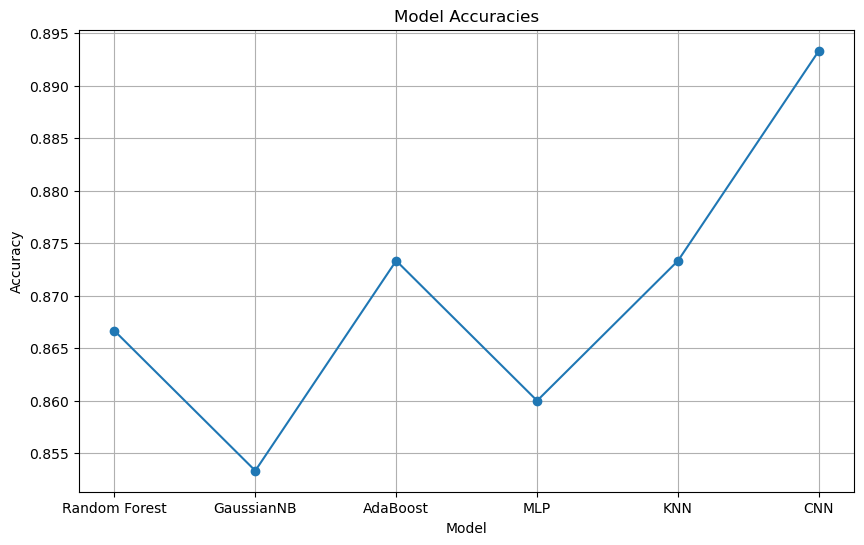

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Conv1D, GlobalAveragePooling1D, Dropout, Dense, Reshape
from keras.utils import to_categorical

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the list to store results
results = []

# Random Forest model evaluation
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Append the results to the list
results.append(['Random Forest', accuracy, precision, recall, f1, auc])

# Repeat similar steps for other models (GaussianNB, AdaBoost, MLP, KNN, CNN)
# GaussianNB model evaluation
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
auc = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1]) 
results.append(['GaussianNB', accuracy, precision, recall, f1, auc])

# AdaBoost model evaluation
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1]) 
results.append(['AdaBoost', accuracy, precision, recall, f1, auc])

# MLP model evaluation
mlp = MLPClassifier(max_iter=300)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
auc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1]) 
results.append(['MLP', accuracy, precision, recall, f1, auc])

# KNN model evaluation
X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
# Fit the classifier
knn.fit(X_train_contiguous, y_train)
# Make predictions
y_pred = knn.predict(X_test_contiguous)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
y_prob = knn.predict_proba(X_test_contiguous)
auc = roc_auc_score(y_test, y_prob[:, 1])
results.append(['KNN', accuracy, precision, recall, f1, auc])

# CNN model evaluation
input_shape = X_train.shape[1]
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

model = Sequential()
model.add(Reshape((input_shape, 1), input_shape=(input_shape,)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train.astype('float64'), epochs=10, batch_size=64, verbose=0)
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
y_pred_proba = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_proba)
results.append(['CNN', accuracy, precision, recall, f1, auc])

# Convert the results to a DataFrame
metrics_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC"])

# Print the DataFrame
print(metrics_df)

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.plot(metrics_df["Model"], metrics_df["Accuracy"], marker='o')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


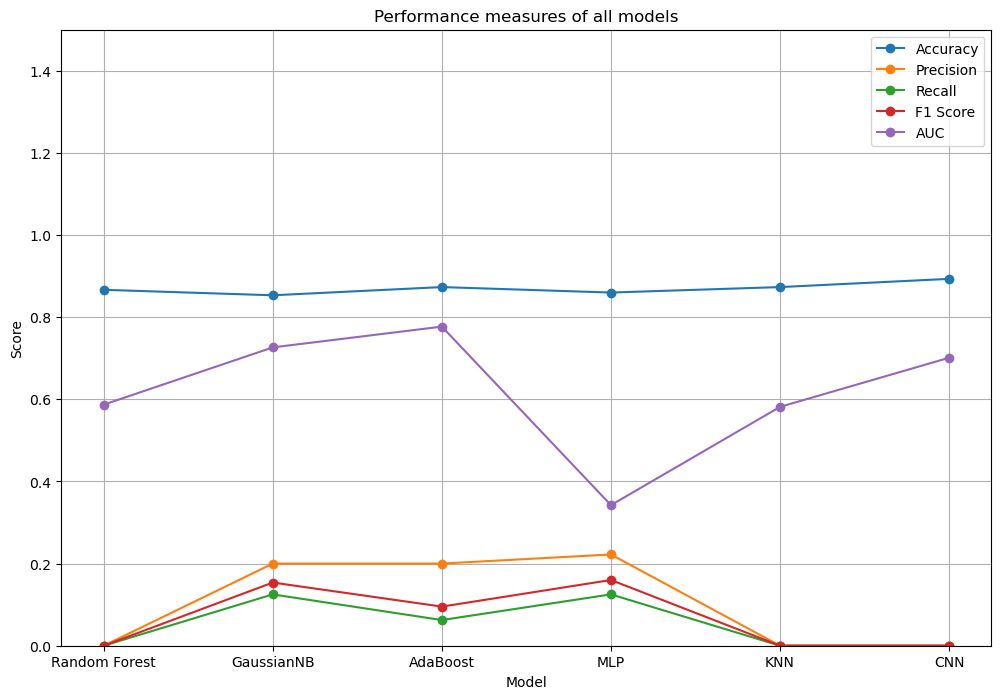

In [126]:
plt.figure(figsize=(12, 8))

for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']:
    plt.plot(metrics_df['Model'], metrics_df[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance measures of all models')
plt.ylim(0.0, 1.5)
plt.legend()
plt.grid(True)

plt.show()

## Ensemble PRO

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
print(X_selected)

[[  1.1   1.4   1.4 ...   1.2   1.2   1.4]
 [  1.    1.    1.  ...   1.    1.    1. ]
 [ 24.    5.    1.  ...  44.   19.    9. ]
 ...
 [ 82.   11.    3.  ... 285.  190.   21. ]
 [ 10.    2.    1.  ...  19.   13.    3. ]
 [ 28.    6.    5.  ...  67.   37.   11. ]]


## Poor Rich Ensemble

In [81]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28)) / 255.0  # Reshape to (samples, time steps, features)
x_test = x_test.reshape((-1, 28, 28)) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define Conv1D architecture
def create_model(filters, kernel_size, pool_size, units):
    model = Sequential([
        Conv1D(filters, kernel_size, activation='relu', input_shape=(28, 28)),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(units, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define Poor-Rich algorithm
def poor_rich_cnn(max_iter, n_particles, alpha):
    # Define search space
    search_space = [(8, 64), (3, 9), (2, 4), (16, 128)]
    # Initialize particles
    particles = np.random.randint(0, high=1, size=(n_particles, len(search_space)))  # Random initialization
    best_positions = particles.copy()
    best_scores = np.zeros(n_particles)
    global_best_position = None
    global_best_score = float('inf')

    for _ in range(max_iter):
        for i, particle in enumerate(particles):
            # Decode particle position
            decoded_position = [search_space[j][particle[j]] for j in range(len(search_space))]
            # Create CNN model with decoded hyperparameters
            model = create_model(*decoded_position)
            # Train model
            history = model.fit(x_train, y_train, epochs=1, verbose=0)
            score = history.history['loss'][0]
            # Update particle best position and score
            if score < best_scores[i]:
                best_scores[i] = score
                best_positions[i] = particle.copy()
            # Update global best position and score
            if score < global_best_score:
                global_best_score = score
                global_best_position = particle.copy()

        # Identify the poorest and richest particles
        poorest_particle = particles[np.argmin(best_scores)]
        richest_particle = particles[np.argmax(best_scores)]

        # Update positions of poor particles towards richest particle
        for i in range(n_particles):
            if np.array_equal(particles[i], poorest_particle):
                continue  # Skip updating the poorest particle
            particles[i] += alpha * (richest_particle - particles[i])

    # Decode global best position
    best_hyperparameters = [search_space[j][global_best_position[j]] for j in range(len(search_space))]
    
    return best_positions, best_hyperparameters

# Combine multiple models to form an ensemble
def ensemble_prediction(models, X):
    predictions = np.array([model.predict(X) for model in models])
    return np.mean(predictions, axis=0)

# Example usage
best_positions, best_hyperparameters = poor_rich_cnn(max_iter=10, n_particles=5, alpha=0.1)
print("Best hyperparameters found by Poor-Rich algorithm:", best_hyperparameters)

# Create and train an ensemble of models
models = [create_model(*[best_hyperparameters[j] for j in range(len(best_hyperparameters))]) for _ in range(5)]
for model in models:
    model.fit(x_train, y_train, epochs=5, verbose=0)

# Evaluate the ensemble model
ensemble_pred = ensemble_prediction(models, x_test)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(ensemble_pred, axis=1))
print("Accuracy of the ensemble model:", ensemble_accuracy)


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Best hyperparameters found by Poor-Rich algorithm: [8, 3, 2, 16]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy of the ensemble model: 0.9687
